In [1]:
# configuring path
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7Z5bYdktZutVo22JVaUgFoVsg296jwL0_hwece59YsfXds-w_MFns
Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/time_series
!pwd

/content/drive/MyDrive/Colab Notebooks/time_series
/content/drive/MyDrive/Colab Notebooks/time_series


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, SimpleRNN
from keras.optimizers import Adam
from keras.utils import plot_model

In [ ]:
# load data
df = pd.read_csv('for_time_series_forceasting_pedestrian_count.tsv',sep='\t')
df

,Date,Daily global solar exposure (MJ/m*m),Covid Restrictions,Rainfall amount (millimetres),Public_Holiday,Maximum temperature (Degree C),Minimum temperature (Degree C),Total_Pedestrian_Count_per_day
0,01-01-2015,23.6,0,0.0,1,26.9,13.3,471563
1,01-02-2015,26.8,0,0.0,0,38.8,15.4,389048
2,01-03-2015,26.5,0,0.0,0,38.2,20.0,291761
3,01-04-2015,25.2,0,4.6,0,21.4,16.3,382364
4,01-05-2015,30.7,0,0.0,0,22.0,15.0,487220
...,...,...,...,...,...,...,...,...
2127,10-27-2020,20.1,1,0.0,0,19.6,11.1,177267
2128,10-28-2020,26.7,1,0.0,0,20.9,9.5,311278
2129,10-29-2020,17.1,1,0.0,0,24.3,11.2,263334
2130,10-30-2020,21.0,1,0.0,0,18.6,12.9,313225


original data


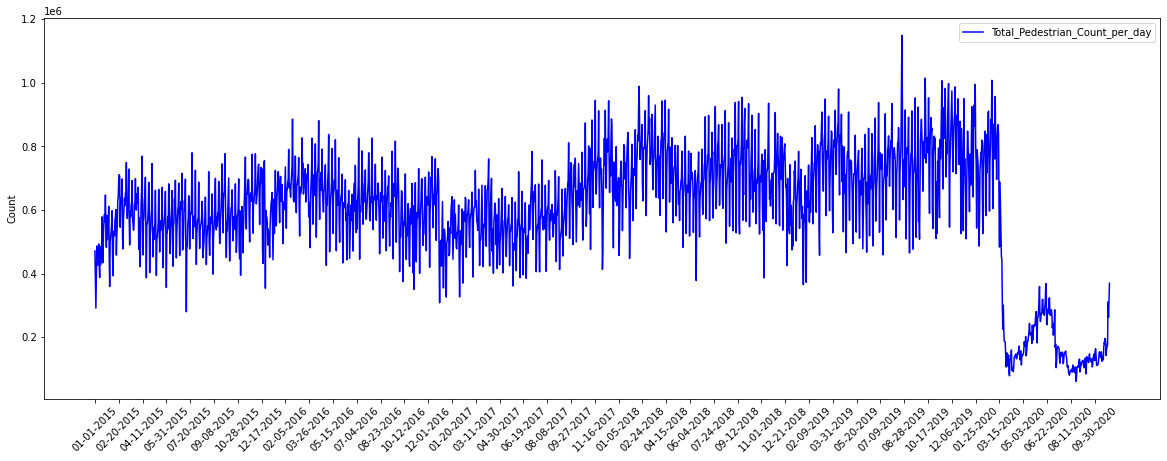

In [ ]:
# show pedestrian count each day
print('original data')
plt.figure(figsize = (20, 7))
plt.plot(range(len(df)), df['Total_Pedestrian_Count_per_day'], color='blue', label='Total_Pedestrian_Count_per_day')
plt.xticks(range(0,len(df),50),df['Date'].loc[::50],rotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()


Normalized data


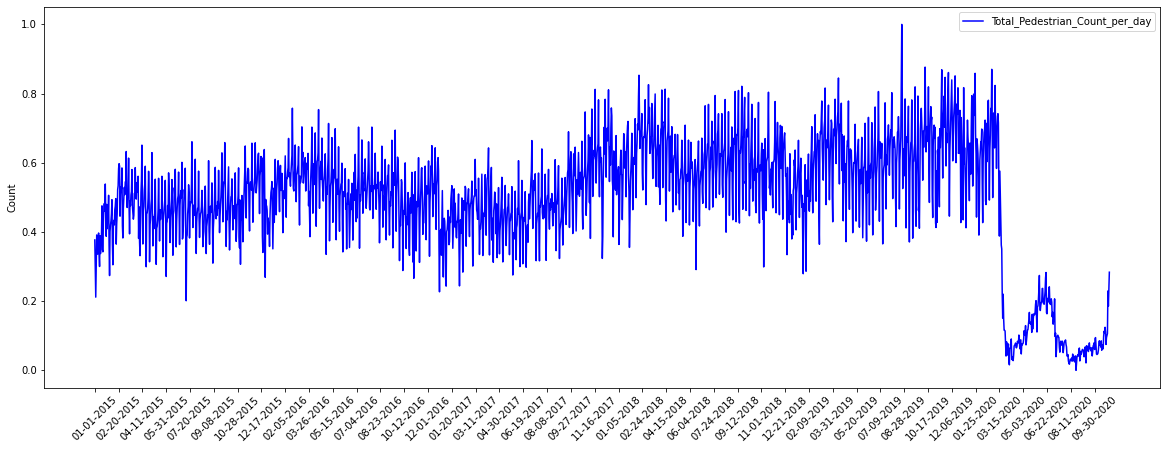

In [ ]:
# Data Normalization
scaler = MinMaxScaler()
df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:].values)    # normalize feature except the date column
# test_x.iloc[:, 1:] = scaler.transform(test_x.iloc[:, 1:].values)

print('\nNormalized data')
plt.figure(figsize = (20, 7))
plt.plot(range(len(df)), df['Total_Pedestrian_Count_per_day'], color='blue', label='Total_Pedestrian_Count_per_day')
plt.xticks(range(0,len(df),50),df['Date'].loc[::50],rotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
df

,Date,Daily global solar exposure (MJ/m*m),Covid Restrictions,Rainfall amount (millimetres),Public_Holiday,Maximum temperature (Degree C),Minimum temperature (Degree C),Total_Pedestrian_Count_per_day
0,01-01-2015,0.702454,0.0,0.00000,1.0,0.518841,0.463504,0.376885
1,01-02-2015,0.800613,0.0,0.00000,0.0,0.863768,0.540146,0.301011
2,01-03-2015,0.791411,0.0,0.00000,0.0,0.846377,0.708029,0.211554
3,01-04-2015,0.751534,0.0,0.08042,0.0,0.359420,0.572993,0.294865
4,01-05-2015,0.920245,0.0,0.00000,0.0,0.376812,0.525547,0.391282
...,...,...,...,...,...,...,...,...
2127,10-27-2020,0.595092,1.0,0.00000,0.0,0.307246,0.383212,0.106274
2128,10-28-2020,0.797546,1.0,0.00000,0.0,0.344928,0.324818,0.229500
2129,10-29-2020,0.503067,1.0,0.00000,0.0,0.443478,0.386861,0.185415
2130,10-30-2020,0.622699,1.0,0.00000,0.0,0.278261,0.448905,0.231290


In [ ]:
n_past = 150           # no of past days used to predict the future
n_future = 10         # no of future days being predicted


x_train = []
y_train = []

for i in range(n_past, len(df)):
	x_train.append(df.iloc[i-n_past:i, 1:].values) # use all column apart from date as feature
	y_train.append(df.iloc[i,-1]) # considering last column as target label

x_train, y_train = np.array(x_train), np.array(y_train).reshape(-1, 1)
print('Train data shape: ', x_train.shape)
print('Train Target shape: ', y_train.shape)

Train data shape:  (1982, 150, 7)
Train Target shape:  (1982, 1)


In [ ]:
# test on last N days
LAST_N_DAYS = 30

train_x = x_train[:-LAST_N_DAYS,:,:]
train_y = y_train[:-LAST_N_DAYS,:]
print('Train data shape: ', train_x.shape)
print('Train Target shape: ', train_y.shape)

test_x = x_train[-LAST_N_DAYS:,:,:]
test_y = y_train[-LAST_N_DAYS:,:]
print('Test data shape: ', test_x.shape)
print('Test Target shape: ', test_y.shape)

Train data shape:  (1952, 150, 7)
Train Target shape:  (1952, 1)
Test data shape:  (30, 150, 7)
Test Target shape:  (30, 1)


# Simple RNN

Add SimpleRNN model here

In [ ]:
model = Sequential()

model.add(SimpleRNN(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(1))

opt = Adam(lr=1e-3)
model.compile(optimizer=opt, loss='mae')

model_history = model.fit(
                            train_x, train_y, 
                            epochs=100, 
                            batch_size=32, 
                            # validation_data=(test_x, test_y)
                            validation_split=.2
                        )

Epoch 1/100
49/49 [==============================] - 10s 142ms/step - loss: 0.8611 - val_loss: 0.0640
Epoch 2/100
49/49 [==============================] - 6s 128ms/step - loss: 0.0869 - val_loss: 0.0595
Epoch 3/100
49/49 [==============================] - 6s 130ms/step - loss: 0.0791 - val_loss: 0.0864
Epoch 4/100
49/49 [==============================] - 6s 130ms/step - loss: 0.0783 - val_loss: 0.1070
Epoch 5/100
49/49 [==============================] - 6s 128ms/step - loss: 0.0745 - val_loss: 0.0637
Epoch 6/100
49/49 [==============================] - 6s 129ms/step - loss: 0.0808 - val_loss: 0.0681
Epoch 7/100
49/49 [==============================] - 6s 130ms/step - loss: 0.0694 - val_loss: 0.1991
Epoch 8/100
49/49 [==============================] - 6s 131ms/step - loss: 0.0729 - val_loss: 0.0512
Epoch 9/100
49/49 [==============================] - 6s 129ms/step - loss: 0.0707 - val_loss: 0.1494
Epoch 10/100
49/49 [==============================] - 6s 130ms/step - loss: 0.0672 - val_l

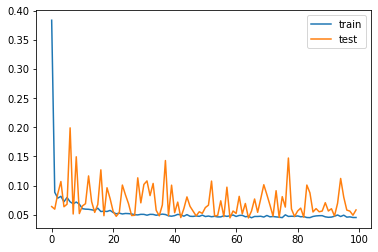

In [ ]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# report error
train_pred = model.predict(train_x)
err = np.mean(np.abs(train_y-train_pred))
print('train MAE error for standard averaging:', err)

test_pred = model.predict(test_x)
err = np.mean(np.abs(test_y-test_pred))
print('test MAE error for standard averaging:', err)

train MAE error for standard averaging: 0.04625543658630555
test MAE error for standard averaging: 0.04963793676829961


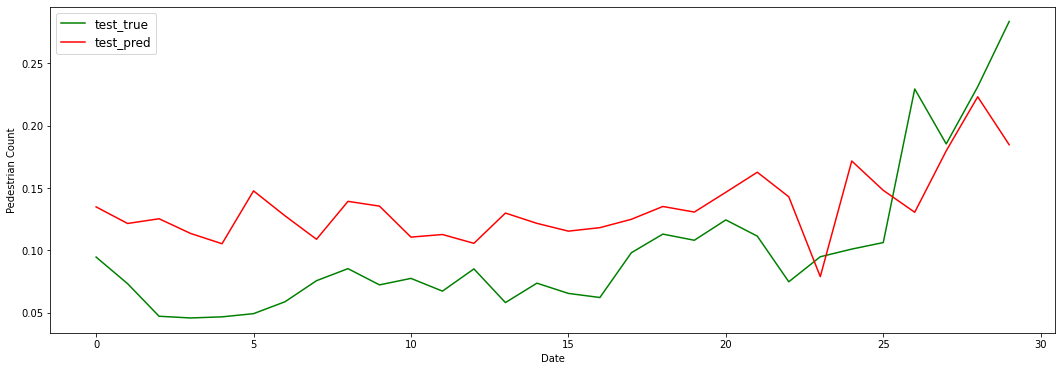

In [ ]:
plt.figure(figsize = (18,6))
# plt.plot(train_y,color='b',label='True')
# plt.plot(train_pred,color='orange',label='Predicted')
# plt.xlabel('Date')
# plt.ylabel('Close')
# plt.legend(fontsize=12)
# plt.show()
plt.plot(test_y,color='g',label='test_true')
plt.plot(test_pred,color='r',label='test_pred')
plt.xlabel('Date')
plt.ylabel('Pedestrian Count')
plt.legend(fontsize=12)
plt.show()

# LSTM

Add LSTM model here

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(1))

opt = Adam(lr=1e-4)
model.compile(optimizer=opt, loss='mae')

model_history = model.fit(
                            train_x, train_y, 
                            epochs=100, 
                            batch_size=32, 
                            # validation_data=(test_x, test_y)
                            validation_split=.2
                        )

Epoch 1/100
49/49 [==============================] - 31s 48ms/step - loss: 0.2145 - val_loss: 0.1480
Epoch 2/100
49/49 [==============================] - 2s 35ms/step - loss: 0.0795 - val_loss: 0.1701
Epoch 3/100
49/49 [==============================] - 2s 33ms/step - loss: 0.0802 - val_loss: 0.1759
Epoch 4/100
49/49 [==============================] - 2s 33ms/step - loss: 0.0782 - val_loss: 0.1976
Epoch 5/100
49/49 [==============================] - 2s 32ms/step - loss: 0.0761 - val_loss: 0.1858
Epoch 6/100
49/49 [==============================] - 2s 32ms/step - loss: 0.0764 - val_loss: 0.1891
Epoch 7/100
49/49 [==============================] - 2s 32ms/step - loss: 0.0777 - val_loss: 0.1770
Epoch 8/100
49/49 [==============================] - 2s 31ms/step - loss: 0.0779 - val_loss: 0.1619
Epoch 9/100
49/49 [==============================] - 2s 31ms/step - loss: 0.0749 - val_loss: 0.1681
Epoch 10/100
49/49 [==============================] - 2s 32ms/step - loss: 0.0738 - val_loss: 0.188

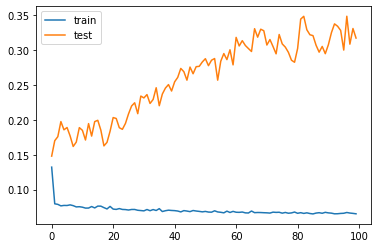

In [ ]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# report error
train_pred = model.predict(train_x)
err = np.mean(np.abs(train_y-train_pred))
print('train MAE error for standard averaging:', err)

test_pred = model.predict(test_x)
err = np.mean(np.abs(test_y-test_pred))
print('test MAE error for standard averaging:', err)

train MAE error for standard averaging: 0.11440671313979417
test MAE error for standard averaging: 0.5066634539983679


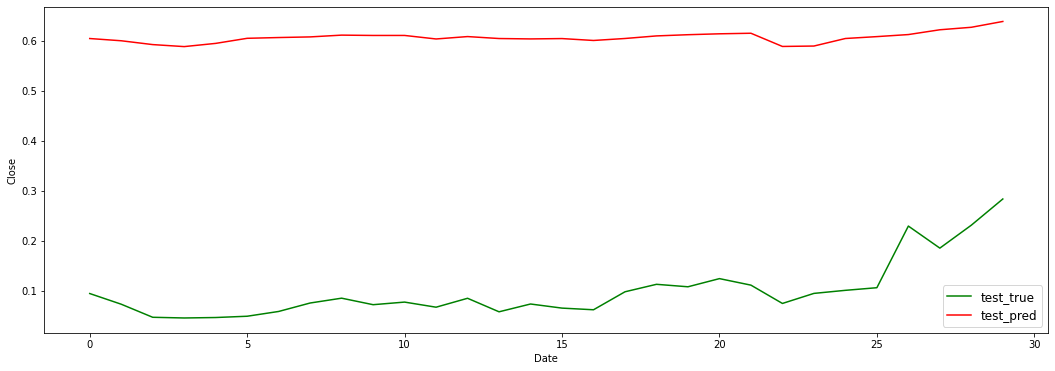

In [ ]:
plt.figure(figsize = (18,6))
# plt.plot(train_y,color='b',label='True')
# plt.plot(train_pred,color='orange',label='Predicted')
# plt.xlabel('Date')
# plt.ylabel('Close')
# plt.legend(fontsize=12)
# plt.show()
plt.plot(test_y,color='g',label='test_true')
plt.plot(test_pred,color='r',label='test_pred')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(fontsize=12)
plt.show()